In [1]:
import pandas as pd
import sklearn as sk
import os
import csv
import chardet
import re
import matplotlib.pyplot as plt

In [2]:
# Diretórios das pastas com as notícias
real = 'Real'
falso = 'Falso'

In [3]:
# Função para ler o conteúdo de um arquivo de texto
def ler_arquivo(arquivo):
    with open(arquivo, 'rb') as f:
        # Detecta a codificação do arquivo
        resultado = chardet.detect(f.read())
        # Volta para o início do arquivo
        f.seek(0)
        # Lê o arquivo usando a codificação detectada
        texto = f.read().decode(resultado['encoding'])
        # Remove BOM, espaços duplicados
        texto = texto.lstrip('\ufeff').strip()
        texto = re.sub(r'\s+', ' ', texto)
        return texto


In [4]:
# Função para remover espaços duplicados em uma linha do CSV
def remover_duplos_espacos(texto):
    return re.sub(r'\s+', ' ', texto)

In [5]:
# Lista para armazenar as linhas do CSV
linhas_csv = []

In [6]:
# Função para listar os arquivos em uma pasta e adicionar o texto à lista do CSV
def listar_arquivos(diretorio, categoria):
    for arquivo in os.listdir(diretorio):
        if arquivo.endswith('.txt'):
            texto = ler_arquivo(os.path.join(diretorio, arquivo))
            linhas_csv.append([remover_duplos_espacos(texto), categoria])

In [7]:
# Lista os arquivos da primeira pasta
listar_arquivos(real, 'Real')

In [8]:
# Lista os arquivos da segunda pasta
listar_arquivos(falso, 'Falso')

In [9]:
# Escreve as linhas no arquivo CSV
with open('noticias.csv', 'w', newline='', encoding='utf-8') as csvfile:
    escritor_csv = csv.writer(csvfile)
    escritor_csv.writerow(['Texto', 'Categoria'])
    for linha in linhas_csv:
        escritor_csv.writerow(linha)

In [10]:
df = pd.read_csv('noticias.csv')

df.head()

,Texto,Categoria
0,O Podemos decidiu expulsar o deputado federal ...,Real
1,"Bolsonaro é um liberal completo, diz president...",Real
2,Ministro do STF libera Andrea Neves de prisão ...,Real
3,"Apesar da abundância, cresce preocupação com p...",Real
4,"Por que Harvard e MIT levarão Dilma, Moro e Su...",Real


In [11]:
df.shape[0]

7200

In [12]:
df.isnull().sum()

Texto        0
Categoria    0
dtype: int64

In [13]:
# remove campos vazios
df = df.dropna()

df.isnull().sum()

In [14]:
df.duplicated().sum()

1

In [15]:
# remove duplicatas
df = df.drop_duplicates()

df.shape[0]

7199

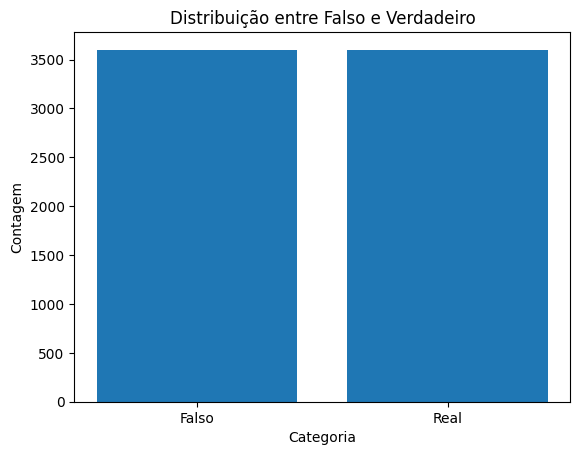

In [16]:
contagem = df['Categoria'].value_counts()

plt.bar(contagem.index, contagem.values)
plt.title('Distribuição entre Falso e Verdadeiro')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()

In [17]:
df2 = pd.read_csv('FakeTrueBr_corpus.csv')

df2.head()

,title_fake,fake,link_f,true,link_t
0,vídeo mostra arrastão em olinda pe por causa d...,carnaval em olinda. arrastão monstro. fazuele ...,https://www.boatos.org/entretenimento/video-ar...,circula pelas redes sociais um vídeo que most...,https://g1.globo.com/pe/pernambuco/carnaval/20...
1,carro alegórico da grande rio em homenagem ao ...,carro alegórico da escola de samba grande rio...,https://www.boatos.org/entretenimento/carro-al...,pouco antes de a beijaflor de nilópolis entra...,https://g1.globo.com/rj/rio-de-janeiro/carnava...
2,cantor leo chaves grava vídeo de apoio a manif...,cantor léo apoiando atos antidemocráticos. alg...,https://www.boatos.org/entretenimento/cantor-l...,circula nas redes sociais um vídeo que mostra...,https://g1.globo.com/fato-ou-fake/noticia/2023...
3,anitta está com câncer e pede por um milagre e...,versão 1 ore muito pela cantora anitta! ela es...,https://www.boatos.org/entretenimento/anitta-e...,"anitta explicou, nesta terçafeira 7, o proble...",https://g1.globo.com/pop-arte/noticia/2022/06/...
4,erasmo carlos morre aos 81 anos no rio de jane...,morre erasmo carlos aos 81 anos cantor conside...,https://www.boatos.org/entretenimento/erasmo-c...,"o cantor e compositor erasmo carlos, de 81 an...",https://g1.globo.com/rj/rio-de-janeiro/noticia...


In [18]:
# Cria um novo DataFrame com as colunas desejadas
novo_df = pd.DataFrame(columns=['Texto', 'Categoria'])

# Adiciona os dados das colunas 2 e 4 ao novo DataFrame
novo_df['Texto'] = pd.concat([df2.iloc[:, 1], df2.iloc[:, 3]], ignore_index=True)
novo_df['Categoria'] = ['Falso'] * len(df2) + ['Real'] * len(df2)

novo_df.head()

,Texto,Categoria
0,carnaval em olinda. arrastão monstro. fazuele ...,Falso
1,carro alegórico da escola de samba grande rio...,Falso
2,cantor léo apoiando atos antidemocráticos. alg...,Falso
3,versão 1 ore muito pela cantora anitta! ela es...,Falso
4,morre erasmo carlos aos 81 anos cantor conside...,Falso


In [19]:
novo_df.shape[0]

3582

In [20]:
novo_df.isnull().sum()

Texto        0
Categoria    0
dtype: int64

In [21]:
novo_df.duplicated().sum()

399

In [22]:
# remove duplicatas
novo_df = novo_df.drop_duplicates()

novo_df.shape[0]

3183

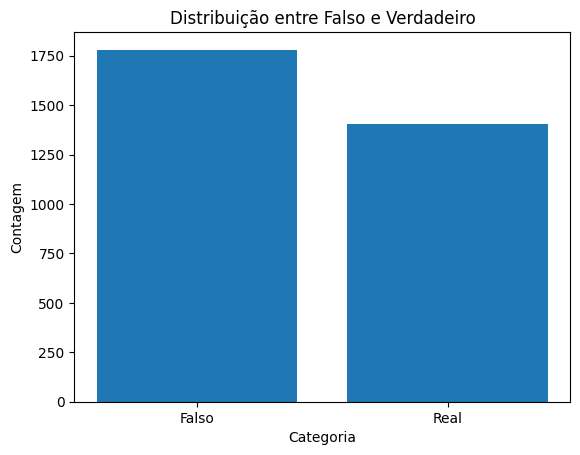

In [23]:
contagem = novo_df['Categoria'].value_counts()

plt.bar(contagem.index, contagem.values)
plt.title('Distribuição entre Falso e Verdadeiro')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()

In [24]:
# Junta os DataFrames sem adicionar ou renomear colunas
df_junto = pd.concat([df,novo_df])

# Visualiza os primeiros registros do DataFrame resultante
df_junto.head()


,Texto,Categoria
0,O Podemos decidiu expulsar o deputado federal ...,Real
1,"Bolsonaro é um liberal completo, diz president...",Real
2,Ministro do STF libera Andrea Neves de prisão ...,Real
3,"Apesar da abundância, cresce preocupação com p...",Real
4,"Por que Harvard e MIT levarão Dilma, Moro e Su...",Real


In [25]:
df_junto.duplicated().sum()

0

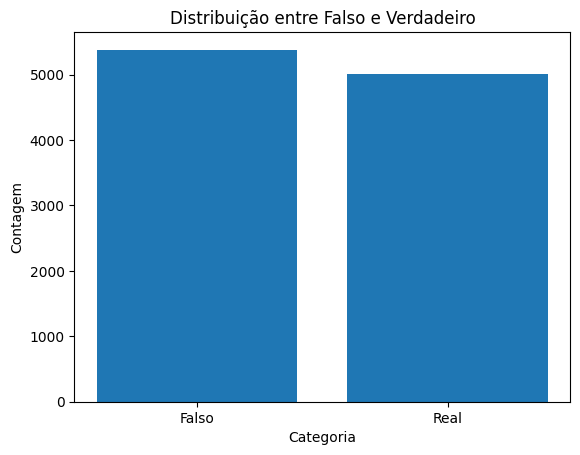

In [26]:
contagem = df_junto['Categoria'].value_counts()

plt.bar(contagem.index, contagem.values)
plt.title('Distribuição entre Falso e Verdadeiro')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()

In [28]:
df3 = pd.read_excel('FakeRecogna_no_removal_words.xlsx')

df3.head()

,Titulo,Subtitulo,Noticia,Categoria,Data,Autor,URL,Classe
0,\n\nArthur Lira fraudou a votação sobre voto i...,Boato – Está comprovado que a votação sobre o ...,bomba lira fraudar o votação brasília explodir...,política,17/08/2021,\nEdgard Matsuki,https://www.boatos.org/politica/arthur-lira-fr...,0
1,WhatsApp agora permite silenciar conversas e g...,"Opção vinha sendo testada no aplicativo, e foi...",o whatsapp liberar quinta-feira atualização ap...,política,23/10/2020 10h02,Por G1,https://g1.globo.com/economia/tecnologia/notic...,1
2,"Com Lula, Bolsonaro e Ciro, Fortaleza vira mic...",NaN,debater propor o cidade o campanha prefeitura ...,política,27/10/2020 04h00,Carlos Madeiro,https://noticias.uol.com.br/eleicoes/2020/10/2...,1
3,Alesp aprova projeto que multa em até R$ 100 m...,NaN,o alesp assembleia legislativo paulo aprovar h...,saúde,10/02/2021 23h56,10/02/2021 23h56,https://noticias.uol.com.br/saude/ultimas-noti...,1
4,\n Não é verdade que Fauci sabia há 15 anos q...,Publicações compartilhadas dezenas de vezes de...,“ fauci aprovar o hidroxicloroquina haver ano ...,saúde,11/08/2020 às 20:45,AFP Austrália,https://checamos.afp.com//nao-e-verdade-que-fa...,0


In [29]:
# Cria a coluna "Texto" mesclando as colunas 1, 2 e 3
df3['Texto'] = df3['Noticia']

# Realiza mapeamento dos valores da coluna 8 para "Real" e "Falso" e criar a coluna "Categoria"
df3['Categoria'] = df3['Classe'].map({0: 'Real', 1: 'Falso'})

# Mantem apenas as colunas "Texto" e "Categoria"
df3 = df3[['Texto', 'Categoria']]

# Visualiza os primeiros registros do DataFrame atualizado
df3.head()

,Texto,Categoria
0,bomba lira fraudar o votação brasília explodir...,Real
1,o whatsapp liberar quinta-feira atualização ap...,Falso
2,debater propor o cidade o campanha prefeitura ...,Falso
3,o alesp assembleia legislativo paulo aprovar h...,Falso
4,“ fauci aprovar o hidroxicloroquina haver ano ...,Real


In [30]:
df3.shape[0]

11902

In [31]:
df3.isnull().sum()

Texto        0
Categoria    0
dtype: int64

In [32]:
df3.duplicated().sum()

16

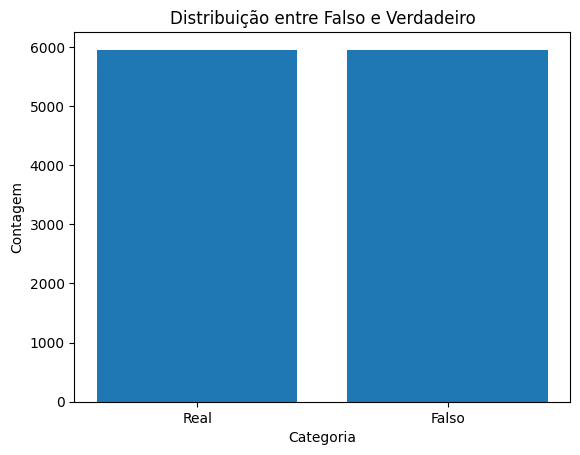

In [33]:
contagem = df3['Categoria'].value_counts()

plt.bar(contagem.index, contagem.values)
plt.title('Distribuição entre Falso e Verdadeiro')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()

In [34]:
# Junta os DataFrames sem adicionar ou renomear colunas
df_final = pd.concat([df_junto,df3])

# Visualiza os primeiros registros do DataFrame resultante
df_final.head()

,Texto,Categoria
0,O Podemos decidiu expulsar o deputado federal ...,Real
1,"Bolsonaro é um liberal completo, diz president...",Real
2,Ministro do STF libera Andrea Neves de prisão ...,Real
3,"Apesar da abundância, cresce preocupação com p...",Real
4,"Por que Harvard e MIT levarão Dilma, Moro e Su...",Real


In [35]:
df_final.shape[0]

22284

In [36]:
df_final.isnull().sum()

Texto        0
Categoria    0
dtype: int64

In [37]:
df_final.duplicated().sum()

16

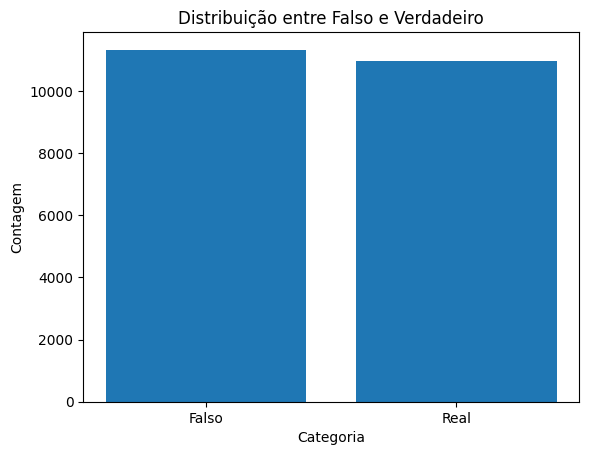

In [38]:
contagem = df_final['Categoria'].value_counts()

plt.bar(contagem.index, contagem.values)
plt.title('Distribuição entre Falso e Verdadeiro')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()

In [39]:
df_final.to_csv('noticias_dados_limpos.csv', index=False)

In [40]:
df_final.head()

,Texto,Categoria
0,O Podemos decidiu expulsar o deputado federal ...,Real
1,"Bolsonaro é um liberal completo, diz president...",Real
2,Ministro do STF libera Andrea Neves de prisão ...,Real
3,"Apesar da abundância, cresce preocupação com p...",Real
4,"Por que Harvard e MIT levarão Dilma, Moro e Su...",Real
